In [62]:
import pandas as pd
from collections import Counter

Where DTM analyzes changes in word weights within topics, a simple word frequency analysis can reveal changes in word frequency over the entirety of a year's corpus. 

To begin, I load in the dataframe created in the previous notebook.

In [2]:
base_df = pd.read_json('base_df.json')

In [6]:
base_df

,text,year,filename,tokenized,lemmas,lemmas_string,token_clean,lemmas_clean,lemmas_clean_string,kmeans_predictions_7,reduced_lemmas
0,ПРАВОВОЕ ВОСПИТАНИЕ МОЛОДЕЖИ\n\nЛЛДИН мз «Днем...,1984,1984 Issue 082 Page 1.txt,"[ПРАВОВОЕ, ВОСПИТАНИЕ, МОЛОДЕЖИЛЛДИН, мз, Днем...","[правовой, воспитание, молодежиллдин, мз, день...",правовой воспитание молодежиллдин мз день депу...,"[ПРАВОВОЕ, ВОСПИТАНИЕ, МОЛОДЕЖИЛЛДИН, мз, Днем...","[правовой, воспитание, молодежиллдин, мз, день...",правовой воспитание молодежиллдин мз день депу...,5,"[правовой, депутат, посвятить, правовой, сср, ..."
1,"ЗЕМЛЯ, ПЛАН И ЛЮДИ\n\nМЫ ЛЮБИМ говорить: земля...",1984,1984 Issue 082 Page 2.txt,"[ЗЕМЛЯ, ПЛАН, И, ЛЮДИМЫ, ЛЮБИМ, говорить, земл...","[земля, план, людимый, любить, говорить, земля...",земля план людимый любить говорить земля главн...,"[ЗЕМЛЯ, ПЛАН, ЛЮДИМЫ, ЛЮБИМ, говорить, земля, ...","[земля, план, людимый, любить, говорить, земля...",земля план людимый любить говорить земля главн...,5,"[земля, земля, главное, земля, обращаться, тру..."
2,В Президиумах Доеных Советов союзных республик...,1984,1984 Issue 082 Page 3.txt,"[В, Президиумах, Доеных, Советов, союзных, рес...","[президиум, доеный, совет, союзный, республику...",президиум доеный совет союзный республикукраин...,"[Президиумах, Доеных, Советов, союзных, респуб...","[президиум, доеный, совет, союзный, республику...",президиум доеный совет союзный республикукраин...,1,"[президиум, союзный, очередной, заседание, пре..."
3,по странам и континентам\n\nновости\n\n\t\t\t\...,1984,1984 Issue 082 Page 4.txt,"[по, странам, и, континентамновостиЛАОСПУТЬ, Б...","[страна, континентамновостилаоспуть, борьба, и...",страна континентамновостилаоспуть борьба ишвец...,"[странам, континентамновостиЛАОСПУТЬ, БОРЬБЫ, ...","[страна, континентамновостилаоспуть, борьба, и...",страна континентамновостилаоспуть борьба ишвец...,6,"[борьба, март, тасса, обращение, социалистичес..."
4,Фотоатлас «Известий»\n\nВьетнам\n\nИзо дня в д...,1984,1984 Issue 082 Page 5.txt,"[Фотоатлас, ИзвестийВьетнамИзо, дня, в, дань, ...","[фотоатлас, известийтнийтнамиз, день, дань, кр...",фотоатлас известийтнийтнамиз день дань крепнут...,"[Фотоатлас, ИзвестийВьетнамИзо, дня, дань, кре...","[фотоатлас, известийтнийтнамиз, день, дань, кр...",фотоатлас известийтнийтнамиз день дань крепнут...,6,"[дружба, сотрудничество, социалистический, тру..."
...,...,...,...,...,...,...,...,...,...,...,...
1299,﻿№ 94 •\nИЗВЕСТИЯ\n22 мая 1997 года • 4^\nИрин...,1997,1997 Issue 94 May 22 Page 5.txt,"[ИЗВЕСТИЯ, мая, года, Ирина, СУВОРОВА, Илья, Х...","[известие, май, год, ирина, суворовый, илья, х...",известие май год ирина суворовый илья хаить ис...,"[ИЗВЕСТИЯ, мая, года, Ирина, СУВОРОВА, Илья, Х...","[известие, май, год, ирина, суворовый, илья, х...",известие май год ирина суворовый илья хаить ис...,1,"[май, сложный, задача, стоять, институт, собст..."
1300,﻿№ 94 •\nИЗВЕСТИЯ\nБОЛЬШИЕ\nОЗМОЖНОСТИ\nРОСТА\...,1997,1997 Issue 94 May 22 Page 6.txt,"[ИЗВЕСТИЯБОЛЬШИЕОЗМОЖНОСТИРОСТАДЛЯ, ЗАИНТЕРЕСО...","[известиябольшие-зможташтадтадля, заинтересова...",известиябольшие-зможташтадтадля заинтересованн...,"[ИЗВЕСТИЯБОЛЬШИЕОЗМОЖНОСТИРОСТАДЛЯ, ЗАИНТЕРЕСО...","[известиябольшие-зможташтадтадля, заинтересова...",известиябольшие-зможташтадтадля заинтересованн...,1,"[торговый, работник, компания, владелец, марка..."
1301,﻿БРОКЕРСКАЯ КОМПАНИЯ\nФЫОЧ1РСЫ и ОПЦИОНЫ на АК...,1997,1997 Issue 94 May 22 Page 7.txt,"[БРОКЕРСКАЯ, КОМПАНИЯФЫОЧРСЫ, и, ОПЦИОНЫ, на, ...","[брокерский, компанияфыочрс, опцион, акция, гк...",брокерский компанияфыочрс опцион акция гко дол...,"[БРОКЕРСКАЯ, КОМПАНИЯФЫОЧРСЫ, ОПЦИОНЫ, АКЦИИ, ...","[брокерский, компанияфыочрс, опцион, акция, гк...",брокерский компанияфыочрс опцион акция гко дол...,4,"[акция, спрос, май, деньги, объем, инвестиция,..."
1302,"﻿II • 22 мая 1997 г., четверг\nБИЗНЕС И ЭКОНОМ...",1997,1997 Issue 94 May 22 Page 8.txt,"[мая, г, четвергБИЗНЕС, И, ЭКОНОМИКАФИНАНСОВЫЕ...","[май, год, четвергбизнес, экономикафинансовый,...",май год четвергбизнес экономикафи

Checking to see if there are any other stop words that should be removed from the corpus.

In [9]:
countsDict = {}
for word in base_df['lemmas_clean'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:50]

[('год', 29124),
 ('метр', 8543),
 ('страна', 8410),
 ('ссср', 8233),
 ('новый', 7249),
 ('другой', 6954),
 ('литр', 6732),
 ('человек', 6507),
 ('время', 5993),
 ('дело', 5812),
 ('тонна', 5800),
 ('советский', 5621),
 ('совет', 5487),
 ('первый', 5410),
 ('россия', 5389),
 ('день', 5247),
 ('работа', 5005),
 ('москва', 4915),
 ('подобный', 4874),
 ('вопрос', 4852),
 ('стать', 4625),
 ('много', 4315),
 ('банк', 4296),
 ('более', 4219),
 ('российский', 4197),
 ('рубль', 4195),
 ('тысяча', 4181),
 ('предприятие', 4178),
 ('мир', 4158),
 ('ни', 4147),
 ('должен', 4064),
 ('говорить', 3874),
 ('под', 3784),
 ('рынок', 3689),
 ('также', 3683),
 ('ли', 3645),
 ('иа', 3602),
 ('сшать', 3563),
 ('сказать', 3531),
 ('союз', 3477),
 ('делать', 3472),
 ('самый', 3425),
 ('решение', 3387),
 ('процент', 3385),
 ('иметь', 3345),
 ('республика', 3330),
 ('между', 3329),
 ('программа', 3284),
 ('министр', 3204),
 ('миллион', 3191)]

It is fairly apparent that the word "year" is extraneous. It occurs more than three times as often as the next word, and is likely present in every year in relatively equal amounts. It is unlikely to reveal anything significant by its presence.

The familiar stop word removal process is repeated below.

In [10]:
stop_words = "год"

In [11]:
def stop_word_cleaner(text):
    return [word for word in text if word not in stop_words]

In [13]:
base_df['lemmas_clean2'] = base_df['lemmas_clean'].apply(lambda x: stop_word_cleaner(x))

In [14]:
countsDict = {}
for word in base_df['lemmas_clean2'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:50]

[('метр', 8543),
 ('страна', 8410),
 ('ссср', 8233),
 ('новый', 7249),
 ('другой', 6954),
 ('литр', 6732),
 ('человек', 6507),
 ('время', 5993),
 ('дело', 5812),
 ('тонна', 5800),
 ('советский', 5621),
 ('совет', 5487),
 ('первый', 5410),
 ('россия', 5389),
 ('день', 5247),
 ('работа', 5005),
 ('москва', 4915),
 ('подобный', 4874),
 ('вопрос', 4852),
 ('стать', 4625),
 ('много', 4315),
 ('банк', 4296),
 ('более', 4219),
 ('российский', 4197),
 ('рубль', 4195),
 ('тысяча', 4181),
 ('предприятие', 4178),
 ('мир', 4158),
 ('ни', 4147),
 ('должен', 4064),
 ('говорить', 3874),
 ('под', 3784),
 ('рынок', 3689),
 ('также', 3683),
 ('ли', 3645),
 ('иа', 3602),
 ('сшать', 3563),
 ('сказать', 3531),
 ('союз', 3477),
 ('делать', 3472),
 ('самый', 3425),
 ('решение', 3387),
 ('процент', 3385),
 ('иметь', 3345),
 ('республика', 3330),
 ('между', 3329),
 ('программа', 3284),
 ('министр', 3204),
 ('миллион', 3191),
 ('цена', 3168)]

Now that we have confirmed that "year" is no longer present within the corpus, we can begin to conduct a word frequency analysis of each year. 

The code below is nearly identical to the code above, except that I specified that for every time that the number 1984 appears in the "year" column, the corresponding cell in the "lemmas_clean2" column should be called. This allows me to analyze word frequency by year.

Afterwards, the top 40 most frequent words are saved in a dictionary.

In [69]:
countsDict = {}
for word in base_df.loc[base_df['year'] == 1984, 'lemmas_clean2'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts1984 = {}
word_counts1984.update(word_counts[:40])
word_counts1984

{'ссср': 899,
 'советский': 734,
 'страна': 733,
 'совет': 691,
 'работа': 546,
 'новый': 521,
 'цк': 504,
 'человек': 499,
 'другой': 486,
 'метр': 459,
 'первый': 442,
 'кпсс': 422,
 'дело': 421,
 'время': 392,
 'народный': 390,
 'министр': 374,
 'день': 373,
 'мир': 357,
 'республика': 356,
 'иа': 346,
 'тысяча': 341,
 'председатель': 336,
 'вопрос': 335,
 'партия': 309,
 'план': 304,
 'город': 301,
 'сшать': 300,
 'тонна': 299,
 'народ': 295,
 'член': 294,
 'много': 293,
 'союз': 292,
 'развитие': 282,
 'подобный': 280,
 'стать': 277,
 'более': 275,
 'литр': 272,
 'организация': 257,
 'международный': 256,
 'предприятие': 253}

In [71]:
countsDict = {}
for word in base_df.loc[base_df['year'] == 1985, 'lemmas_clean2'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts1985 = {}
word_counts1985.update(word_counts[:40])

In [72]:
countsDict = {}
for word in base_df.loc[base_df['year'] == 1986, 'lemmas_clean2'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts1986 = {}
word_counts1986.update(word_counts[:40])

In [73]:
countsDict = {}
for word in base_df.loc[base_df['year'] == 1987, 'lemmas_clean2'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts1987 = {}
word_counts1987.update(word_counts[:40])

In [74]:
countsDict = {}
for word in base_df.loc[base_df['year'] == 1988, 'lemmas_clean2'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts1988 = {}
word_counts1988.update(word_counts[:40])

In [75]:
countsDict = {}
for word in base_df.loc[base_df['year'] == 1989, 'lemmas_clean2'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts1989 = {}
word_counts1989.update(word_counts[:40])

In [76]:
countsDict = {}
for word in base_df.loc[base_df['year'] == 1990, 'lemmas_clean2'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts1990 = {}
word_counts1990.update(word_counts[:40])

In [77]:
countsDict = {}
for word in base_df.loc[base_df['year'] == 1991, 'lemmas_clean2'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts1991 = {}
word_counts1991.update(word_counts[:40])

In [78]:
countsDict = {}
for word in base_df.loc[base_df['year'] == 1992, 'lemmas_clean2'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts1992 = {}
word_counts1992.update(word_counts[:40])

In [79]:
countsDict = {}
for word in base_df.loc[base_df['year'] == 1993, 'lemmas_clean2'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts1993 = {}
word_counts1993.update(word_counts[:40])

In [80]:
countsDict = {}
for word in base_df.loc[base_df['year'] == 1994, 'lemmas_clean2'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts1994 = {}
word_counts1994.update(word_counts[:40])

In [81]:
countsDict = {}
for word in base_df.loc[base_df['year'] == 1995, 'lemmas_clean2'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts1995 = {}
word_counts1995.update(word_counts[:40])

In [82]:
countsDict = {}
for word in base_df.loc[base_df['year'] == 1996, 'lemmas_clean2'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts1996 = {}
word_counts1996.update(word_counts[:40])

In [83]:
countsDict = {}
for word in base_df.loc[base_df['year'] == 1997, 'lemmas_clean2'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts1997 = {}
word_counts1997.update(word_counts[:40])

All of the dictionaries are converted into dataframes

In [96]:
count_1984 = pd.DataFrame.from_dict(word_counts1984, orient='index', columns = ['1984'])
count_1985 = pd.DataFrame.from_dict(word_counts1985, orient='index', columns = ['1985'])
count_1986 = pd.DataFrame.from_dict(word_counts1986, orient='index', columns = ['1986'])
count_1987 = pd.DataFrame.from_dict(word_counts1987, orient='index', columns = ['1987'])
count_1988 = pd.DataFrame.from_dict(word_counts1988, orient='index', columns = ['1988'])
count_1989 = pd.DataFrame.from_dict(word_counts1989, orient='index', columns = ['1989'])
count_1990 = pd.DataFrame.from_dict(word_counts1990, orient='index', columns = ['1990'])
count_1991 = pd.DataFrame.from_dict(word_counts1991, orient='index', columns = ['1991'])
count_1992 = pd.DataFrame.from_dict(word_counts1992, orient='index', columns = ['1992'])
count_1993 = pd.DataFrame.from_dict(word_counts1993, orient='index', columns = ['1993'])
count_1994 = pd.DataFrame.from_dict(word_counts1994, orient='index', columns = ['1994'])
count_1995 = pd.DataFrame.from_dict(word_counts1995, orient='index', columns = ['1995'])
count_1996 = pd.DataFrame.from_dict(word_counts1996, orient='index', columns = ['1996'])
count_1997 = pd.DataFrame.from_dict(word_counts1997, orient='index', columns = ['1997'])

In [98]:
count_1984

,1984
ссср,899
советский,734
страна,733
совет,691
работа,546
новый,521
цк,504
человек,499
другой,486
метр,459


And then plotted

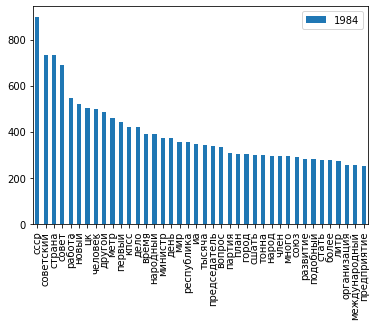

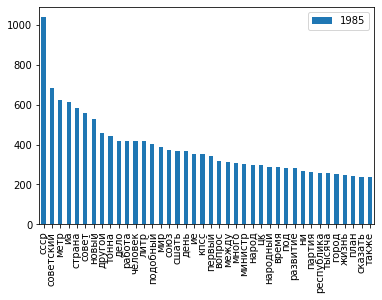

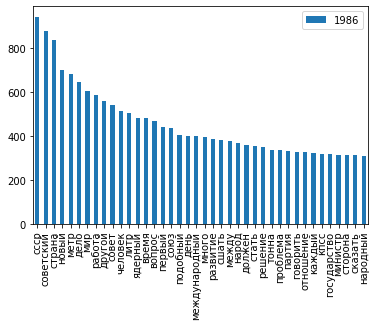

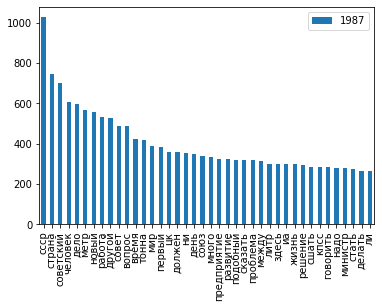

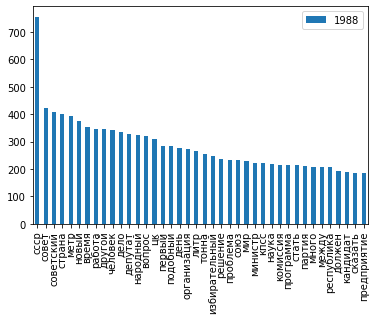

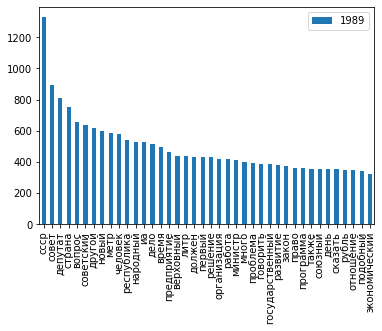

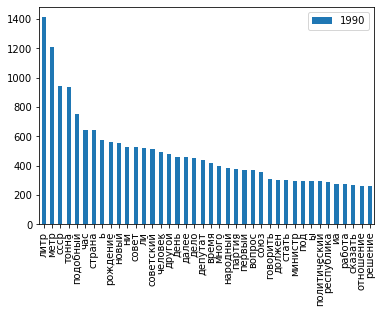

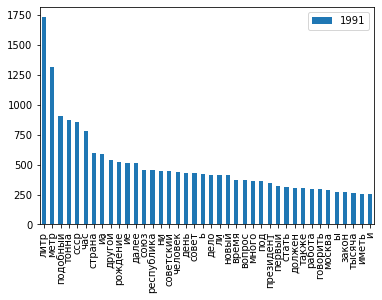

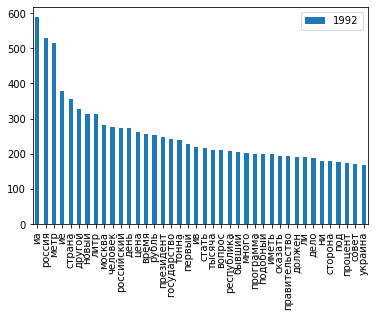

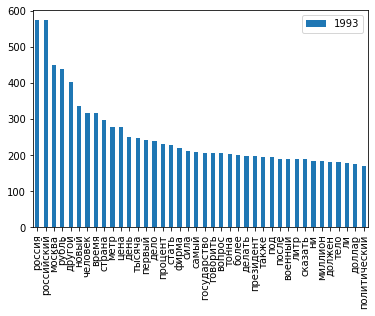

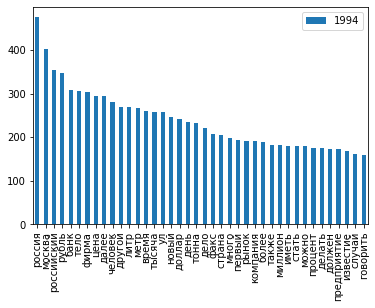

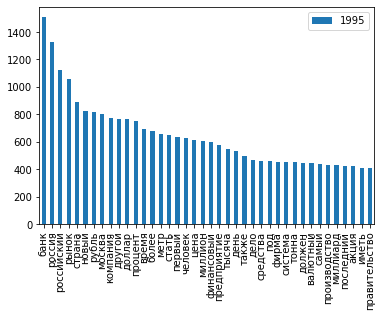

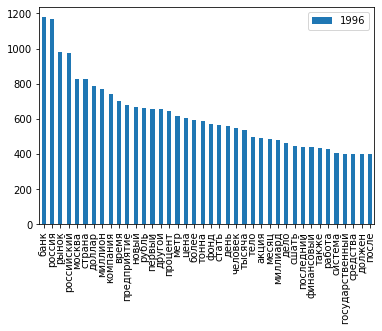

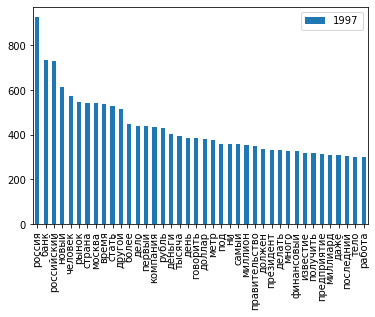

In [97]:
count_1984.plot.bar()
count_1985.plot.bar()
count_1986.plot.bar()
count_1987.plot.bar()
count_1988.plot.bar()
count_1989.plot.bar()
count_1990.plot.bar()
count_1991.plot.bar()
count_1992.plot.bar()
count_1993.plot.bar()
count_1994.plot.bar()
count_1995.plot.bar()
count_1996.plot.bar()
count_1997.plot.bar()